In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def correlation_matrices(los_angeles):
    la_numeric_cols = los_angeles.select_dtypes(include=[np.number]).columns

    # correlation matrix 
    corr_matrix = los_angeles[la_numeric_cols].corr()
    plt.figure(figsize=(12, 12))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Matrix - Los Angeles")
    plt.show()

    # predictive values matrix 
    highly_correlated = ['AM_WAY_PHV','PM_WAY_PHV','AM_K_FACTOR_AMT','AM_D_FACTOR_AMT','AM_KD_FACTOR','PM_K_FACTOR_AMT','PM_D_FACTOR_AMT','PM_KD_FACTOR']
    corr_matrix = los_angeles[highly_correlated].corr()
    plt.figure(figsize=(12,12))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Matrix - Los Angeles")
    plt.show()

In [24]:
def scatter_plots(los_angeles):
    # scatterplots
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=los_angeles, x='AM_HOUR', y='AM_WAY_PHV', alpha=0.5, edgecolor=None)
    plt.xlabel("Morning Hour (AM_HOUR)")
    plt.ylabel("Volume of Cars")
    plt.title("Traffic Volume by Morning Hour in Los Angeles")
    plt.grid(True)
    plt.show()

    # scatterplot with trend-line
    plt.figure(figsize=(10, 6))
    sns.regplot(data=los_angeles, x='AM_HOUR', y='AM_WAY_PHV', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.xlabel("Morning Hour (AM_HOUR)")
    plt.ylabel("AM Peak Hour Volume (AM_WAY_PHV)")
    plt.title("Traffic Volume by Morning Hour in Los Angeles (with Trendline)")
    plt.grid(True)
    plt.show()

In [25]:
YEARS = [2016,2017,2018,2019,2020,2021,2022]

def create_peak_hours():
    all_peak_hours = []
    for year in YEARS:
        file_path = f'./data/peak-hours/{year}-peak-hours.xlsx'
        try:
            df = pd.read_excel(file_path, sheet_name=f'{year} Peak Hour Report')
            df['YEAR'] = year  # Add year column for reference
            # print(df.shape)
            all_peak_hours.append(df)
        except FileNotFoundError:
            print(f"File not found for year {year}, skipping...")

    # Concatenate all years into a single DataFrame
    peak_hours_df = pd.concat(all_peak_hours, ignore_index=True)

    day_mapping = {
        'MON': 0, 'TUE': 1, 'WED': 2, 
        'THU': 3, 'FRI': 4, 'SAT': 5, 'SUN': 6
    }

    month_mapping = {
        'JAN': 0, 'FEB': 1, 'MAR': 2, 
        'APR': 3, 'MAY': 4, 'JUN': 5, 'JUL': 6,
        'AUG': 7,'SEP': 8,'OCT': 9,'NOV': 10,'DEC': 11
    }

    peak_hours_df['AM_DAY'] = peak_hours_df['AM_DAY'].replace(day_mapping)   
    peak_hours_df['AM_MONTH'] = peak_hours_df['AM_MONTH'].replace(month_mapping)
    # peak_hours_df.rename()

    return peak_hours_df

In [26]:
peak_hours = create_peak_hours()
peak_hours.drop(columns=['RTE_SFX','PM_SFX','PM_PFX','PRE','CS'],inplace=True)
peak_hours[['AM_DAY','PM_DAY','AM_HOUR','PM_HOUR','AM_MONTH','PM_MONTH','YEAR']]
peak_hours['AM_MONTH'].unique()
peak_hours.columns

/var/folders/y0/tql4kxn91m51l1_d96hty_z40000gn/T/ipykernel_94835/4205824315.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  peak_hours_df['AM_DAY'] = peak_hours_df['AM_DAY'].replace(day_mapping)
/var/folders/y0/tql4kxn91m51l1_d96hty_z40000gn/T/ipykernel_94835/4205824315.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  peak_hours_df['AM_MONTH'] = peak_hours_df['AM_MONTH'].replace(month_mapping)


Index(['DI', 'RTE', 'CO', 'PM', 'LEG', 'YR', 'AM_DIR', 'AM_WAY_PHV',
       'AM_K_FACTOR_AMT', 'AM_D_FACTOR_AMT', 'AM_KD_FACTOR', 'AM_HOUR',
       'AM_DAY', 'AM_MONTH', 'PM_DIR', 'PM_WAY_PHV', 'PM_K_FACTOR_AMT',
       'PM_D_FACTOR_AMT', 'PM_KD_FACTOR', 'PM_HOUR', 'PM_DAY', 'PM_MONTH',
       'YEAR'],
      dtype='object')

In [27]:
""" STATIC """

COUNTIES = ['LA','ORA','SD','SB']

AM_TIME_BASED_FEATURES = ['AM_HOUR', 'AM_DAY', 'AM_MONTH','YEAR','PM']
PM_TIME_BASED_FEATURES = ['PM_HOUR', 'PM_DAY', 'PM_MONTH','YEAR','PM']

DIRECTIONS = ['N','E','S','W']

# MON - 0 , SUN - 6
DAYS = [0,1,2,3,4,5,6]

# JAN - 0 , DEC - 11
MONTHS = [0,1,2,3,4,5,6,7,8,9,10,11]
YEARS = [2016,2017,2018,2019,2020,2021,2022]

morning_results = []
afternoon_results = []

# MORNING TIME
for year in YEARS:
    df_year = peak_hours[peak_hours['YEAR'] == year]

    for county in COUNTIES: 
        df_county = df_year[df_year['CO'] == county]  # Filter by county
        
        for direction in DIRECTIONS:
            df_dir = df_county[df_county['AM_DIR'] == direction]  # Filter by direction
            
            for month in MONTHS:
                df_month = df_dir[df_dir['AM_MONTH'] == month]

                for day in DAYS:
                    df_day = df_month[df_month['AM_DAY'] == day]  # Filter by day
                    
                    if df_day.shape[0] == 0:
                        continue  # Skip empty results
                    
                    for index, row in df_day.iterrows():
                        morning_results.append({
                            'Year': year, 
                            'Month': month, 
                            'County': county, 
                            'Direction': direction, 
                            'Day': row['AM_DAY'],  # Ensure each row's Day is stored
                            'PHV': row['AM_WAY_PHV']  # Store PHV individually
                        })

# Convert results into a DataFrame for EDA
morning_eda_df = pd.DataFrame(morning_results)


# Pivot table for better visualization
# pivot_eda = morning_eda_df.pivot(index='Day', columns=['Year', 'Month','County', 'Direction'], values='Mean_PHV')
# pivot_eda

In [28]:
morning_eda_df

# AM_DIRECTION_FEATURES = ['AM_DIR','AM_WAY_PHV','AM_K_FACTOR_AMT','AM_D_FACTOR_AMT','AM_KD_FACTOR']
# PM_DIRECTION_FEATURES = ['PM_DIR','PM_WAY_PHV','PM_K_FACTOR_AMT','PM_D_FACTOR_AMT','PM_KD_FACTOR']

,Year,Month,County,Direction,Day,PHV
0,2016,1,LA,N,0,2106
1,2016,1,LA,N,1,4262
2,2016,2,LA,N,2,7932
3,2016,2,LA,N,3,9802
4,2016,3,LA,N,0,4530
...,...,...,...,...,...,...
1780,2022,6,SB,W,5,966
1781,2022,7,SB,W,5,524
1782,2022,8,SB,W,2,552
1783,2022,9,SB,W,6,1352


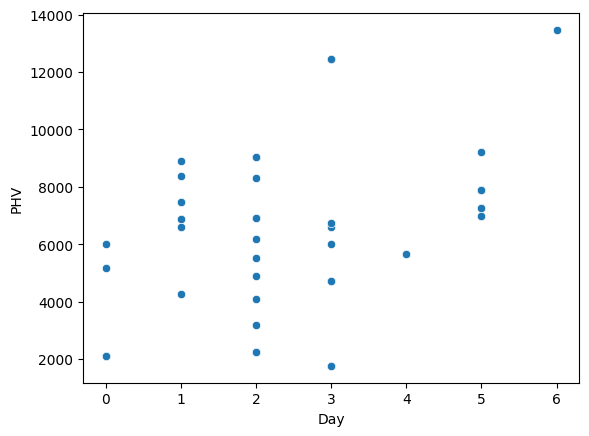

In [34]:
# 2016, January

jan_2016 = morning_eda_df[(morning_eda_df['Month'] == 1) & (morning_eda_df['County'] == 'LA')]


# y_mean = morning_eda_df['PHV'].mean()


sns.scatterplot(x=jan_2016['Day'], y=jan_2016['PHV'])
plt.show()
